In [4]:
import numpy as np #imports numpy as np. Numpy is used for basic matrix multiplication, addition.
import tensorflow as tf #imports tensorflow as tf. Tensorflow is an n-dimensional matrix
#just like a 1-D vector, 2-D array, 3-D array etc.
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.examples.tutorials.mnist import input_data #imports mnist input data from tensorflow examples. 
#Mnist data set consists of images of numbers from 0-9, each image is a 28*28 dimensional. 
#There are total 60k training images and 10k test images.
mnist = input_data.read_data_sets("MNIST/data/", one_hot=True) #using input data call read data sets  
#from a folder MNIST/data and store in mnist. One hot vector is used which means at once only one class  
#will be true. Since our images have labels 0-9 that means out of all 10 classes only 1 class will be true 
#at a time rest all will be zero.

Extracting MNIST/data/train-images-idx3-ubyte.gz
Extracting MNIST/data/train-labels-idx1-ubyte.gz
Extracting MNIST/data/t10k-images-idx3-ubyte.gz
Extracting MNIST/data/t10k-labels-idx1-ubyte.gz


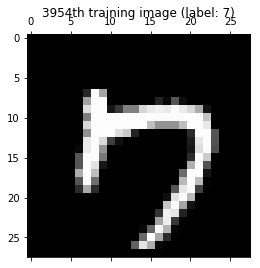

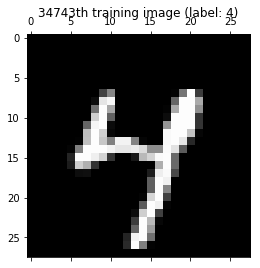

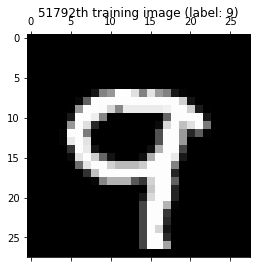

In [6]:
nsample = 3
rand_idx = np.random.randint(mnist.train.images.shape[0], size=nsample)

for i in rand_idx:
    curr_img = np.reshape(mnist.train.images[i, :], (28,28))
    curr_lbl = np.argmax(mnist.train.labels[i, :])
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title(""+str(i)+"th training image "
              + "(label: " + str(curr_lbl) + ")")
    plt.show()



In [5]:
Xtr , Ytr = mnist.train.next_batch(5000) #we use 5K training images and assign the images to Xtr 
#and respective labels of images to Ytr.
Xte , Yte = mnist.test.next_batch(800) # we use 800 test images and assign the images to Xte 
#and respective test label of images to Yte.

#placeholder is like a variable to which we will assign data later on.
#It will allow us to do operations and build our computation graph without feeding in data.
#xtr will hold the training images in form of matrix,the dimensions of xtr will be in our case 5000*784, 
#that is why we use None which allows us to vary the dimensionality of our rows.
#we use float to define its type.
xtr = tf.placeholder("float",[None,784]) 
#similarly xte will hold the test images in form matrix which is squashed in to a 784-D column vector.
xte = tf.placeholder("float",[784])

#nearest neighbour calculation and we use L1 manhattan distance to calculate. 
#In Knn we subtract all the training images with a single test image at a time 
#and calculate the minimum distance between them. The image which has minimum distance 
#we then predict its respective class.
#reduction indices =1 will sum all the values in matrix across all columns.
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))),reduction_indices=1)

#arg_min will return us the position of the value which is minimum in the matrix across all rows. 
pred = tf.arg_min(distance,0)

#we initialise accuracy as zero.
accuracy = 0.

#here we initialise all the variables in our model.
init = tf.global_variables_initializer()

In [6]:
#this is a class that runs all the tensorflow operations and launches the graph in a session. 
#All the operations have to be within the indentation. 
with tf.Session() as sess:
    sess.run(init) #sess.run(init), runs the variables that were initialised in the previous step and evaluates the tensor 
    
#we use for loop, to loop around all the 800 test images and for each test image and all training images we call pred which returns the index of minimum value.    
#using print function we print all test cases, label of index of the minimum value and the label of the actual test image.
    for i in range(len(Xte)):
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i,:]})
        print "Test", i , "Prediction", np.argmax(Ytr[nn_index]), "Ground Truth:", np.argmax(Yte[i])
    
#we then compare the predicted lablel with the actual test label and for all correctly predicted labels we calculate accuracy based on the length of the test data set.    
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte) 
    
    print "Done!"
    print "Accuracy:", accuracy #finally we print the accuracy.

Test 0 Prediction 0 Ground Truth: 0
Test 1 Prediction 8 Ground Truth: 8
Test 2 Prediction 4 Ground Truth: 4
Test 3 Prediction 9 Ground Truth: 9
Test 4 Prediction 7 Ground Truth: 7
Test 5 Prediction 5 Ground Truth: 5
Test 6 Prediction 5 Ground Truth: 5
Test 7 Prediction 2 Ground Truth: 2
Test 8 Prediction 1 Ground Truth: 1
Test 9 Prediction 7 Ground Truth: 7
Test 10 Prediction 4 Ground Truth: 4
Test 11 Prediction 0 Ground Truth: 0
Test 12 Prediction 5 Ground Truth: 3
Test 13 Prediction 8 Ground Truth: 8
Test 14 Prediction 6 Ground Truth: 6
Test 15 Prediction 3 Ground Truth: 3
Test 16 Prediction 3 Ground Truth: 3
Test 17 Prediction 3 Ground Truth: 3
Test 18 Prediction 5 Ground Truth: 5
Test 19 Prediction 1 Ground Truth: 1
Test 20 Prediction 4 Ground Truth: 4
Test 21 Prediction 3 Ground Truth: 8
Test 22 Prediction 1 Ground Truth: 1
Test 23 Prediction 5 Ground Truth: 8
Test 24 Prediction 6 Ground Truth: 6
Test 25 Prediction 1 Ground Truth: 1
Test 26 Prediction 1 Ground Truth: 1
Test 27 Pre

Test 257 Prediction 9 Ground Truth: 9
Test 258 Prediction 6 Ground Truth: 6
Test 259 Prediction 7 Ground Truth: 7
Test 260 Prediction 9 Ground Truth: 9
Test 261 Prediction 6 Ground Truth: 6
Test 262 Prediction 7 Ground Truth: 7
Test 263 Prediction 1 Ground Truth: 1
Test 264 Prediction 8 Ground Truth: 8
Test 265 Prediction 2 Ground Truth: 2
Test 266 Prediction 7 Ground Truth: 7
Test 267 Prediction 6 Ground Truth: 6
Test 268 Prediction 1 Ground Truth: 1
Test 269 Prediction 7 Ground Truth: 2
Test 270 Prediction 0 Ground Truth: 0
Test 271 Prediction 9 Ground Truth: 9
Test 272 Prediction 5 Ground Truth: 5
Test 273 Prediction 0 Ground Truth: 0
Test 274 Prediction 6 Ground Truth: 6
Test 275 Prediction 1 Ground Truth: 1
Test 276 Prediction 0 Ground Truth: 0
Test 277 Prediction 8 Ground Truth: 8
Test 278 Prediction 1 Ground Truth: 1
Test 279 Prediction 9 Ground Truth: 9
Test 280 Prediction 3 Ground Truth: 3
Test 281 Prediction 5 Ground Truth: 5
Test 282 Prediction 0 Ground Truth: 0
Test 283 Pre

Test 499 Prediction 6 Ground Truth: 6
Test 500 Prediction 8 Ground Truth: 8
Test 501 Prediction 3 Ground Truth: 3
Test 502 Prediction 9 Ground Truth: 9
Test 503 Prediction 9 Ground Truth: 9
Test 504 Prediction 8 Ground Truth: 8
Test 505 Prediction 8 Ground Truth: 8
Test 506 Prediction 5 Ground Truth: 5
Test 507 Prediction 3 Ground Truth: 3
Test 508 Prediction 9 Ground Truth: 9
Test 509 Prediction 4 Ground Truth: 4
Test 510 Prediction 6 Ground Truth: 6
Test 511 Prediction 7 Ground Truth: 7
Test 512 Prediction 5 Ground Truth: 5
Test 513 Prediction 0 Ground Truth: 0
Test 514 Prediction 6 Ground Truth: 6
Test 515 Prediction 1 Ground Truth: 1
Test 516 Prediction 0 Ground Truth: 0
Test 517 Prediction 6 Ground Truth: 6
Test 518 Prediction 4 Ground Truth: 4
Test 519 Prediction 8 Ground Truth: 8
Test 520 Prediction 2 Ground Truth: 2
Test 521 Prediction 8 Ground Truth: 8
Test 522 Prediction 2 Ground Truth: 2
Test 523 Prediction 3 Ground Truth: 3
Test 524 Prediction 1 Ground Truth: 1
Test 525 Pre

Test 716 Prediction 3 Ground Truth: 3
Test 717 Prediction 8 Ground Truth: 8
Test 718 Prediction 6 Ground Truth: 6
Test 719 Prediction 3 Ground Truth: 3
Test 720 Prediction 8 Ground Truth: 3
Test 721 Prediction 7 Ground Truth: 7
Test 722 Prediction 9 Ground Truth: 9
Test 723 Prediction 3 Ground Truth: 3
Test 724 Prediction 7 Ground Truth: 7
Test 725 Prediction 8 Ground Truth: 8
Test 726 Prediction 2 Ground Truth: 2
Test 727 Prediction 3 Ground Truth: 3
Test 728 Prediction 5 Ground Truth: 5
Test 729 Prediction 5 Ground Truth: 5
Test 730 Prediction 0 Ground Truth: 0
Test 731 Prediction 2 Ground Truth: 2
Test 732 Prediction 2 Ground Truth: 2
Test 733 Prediction 5 Ground Truth: 5
Test 734 Prediction 4 Ground Truth: 4
Test 735 Prediction 7 Ground Truth: 9
Test 736 Prediction 2 Ground Truth: 2
Test 737 Prediction 9 Ground Truth: 9
Test 738 Prediction 9 Ground Truth: 9
Test 739 Prediction 1 Ground Truth: 1
Test 740 Prediction 2 Ground Truth: 2
Test 741 Prediction 4 Ground Truth: 4
Test 742 Pre